<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/%EC%96%91%EC%9E%90%ED%9A%8C%EB%A1%9C%EC%99%80%20%ED%96%89%EB%A0%AC%EC%97%B0%EC%82%B0%20%EC%98%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!python3 -m pip install qiskit[visualization]

In [40]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

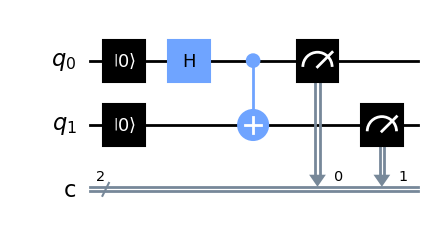

In [41]:
circuit.draw('mpl')

In [77]:
import numpy as np
# |0>과 H Gate 내적 연산
h = np.array([[1 / np.sqrt(2), 1 / np.sqrt(2)],
              [1 / np.sqrt(2), -(1 / np.sqrt(2))]])
q0 = np.array([1, 0])
c0 = np.dot(h, q0)
print(c0)

[0.70710678 0.70710678]


In [81]:
print( 1 / np.sqrt(2))

0.7071067811865475


In [78]:
# c0의 결과와 |0>의 텐서곱
q1 = np.array([0, 1])
d = np.kron(c0, q1)
print(d)

[0.         0.70710678 0.         0.70710678]


In [75]:
# 텐서곱 결과와 CNOT Gate 내적연산
cnot = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])
e = np.dot(cnot, d)
print(e)

[0.         0.70710678 0.70710678 0.        ]


In [82]:
# execute the quantum circuit
backend = BasicAer.get_backend(name='qasm_simulator') # the device to run on
circuit = circuit.compose(other=circuit)
result = backend.run(qobj=transpile(circuits=circuit, backend=backend), shots=1000).result()
counts = result.get_counts(experiment=circuit)
print(counts)

{'11': 496, '00': 504}


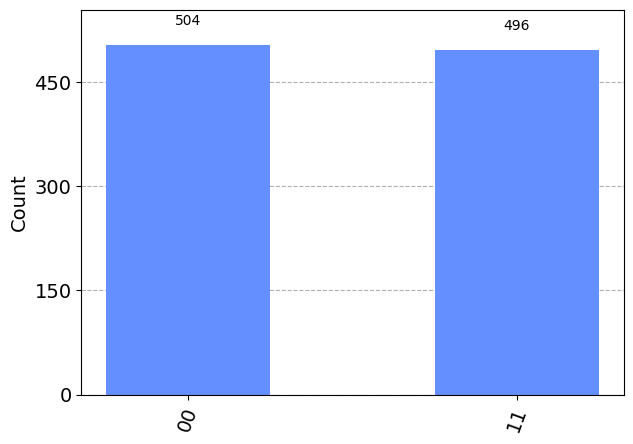

In [83]:
from qiskit.visualization import plot_histogram
plot_histogram(data=counts)

In [84]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit1 = QuantumCircuit(qreg_q, creg_c)

circuit1.reset(qreg_q[0])
circuit1.reset(qreg_q[1])
circuit1.h(qreg_q[0])
circuit1.cx(qreg_q[0], qreg_q[1])
circuit1.measure(qreg_q[0], creg_c[0])
circuit1.measure(qreg_q[1], creg_c[1])

In [50]:
# execute the quantum circuit
backend1 = BasicAer.get_backend(name='statevector_simulator') # the device to run on
result1 = backend.run(qobj=transpile(circuit1, backend1)).result()
psi = result1.get_statevector(experiment=circuit1)

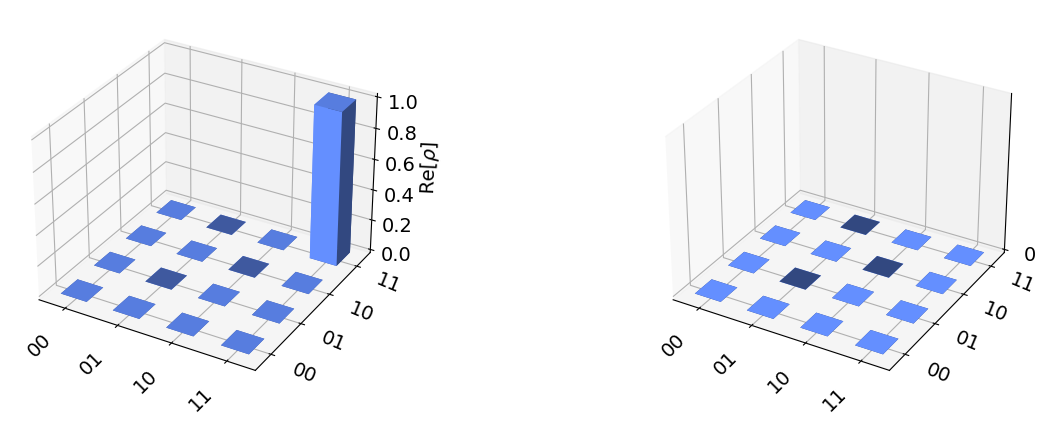

In [51]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
plot_state_city(state=psi)

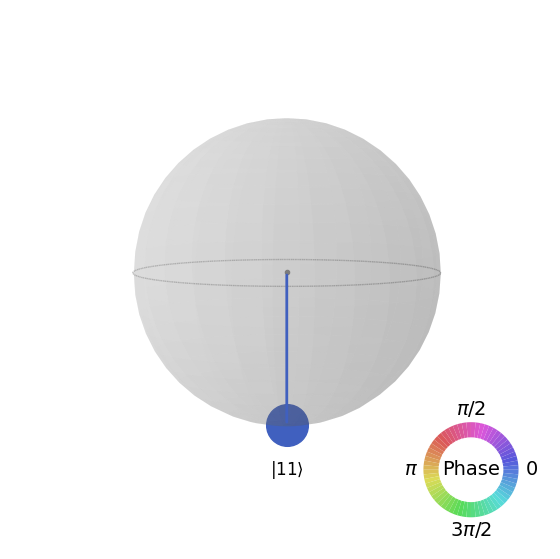

In [52]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(state=psi)

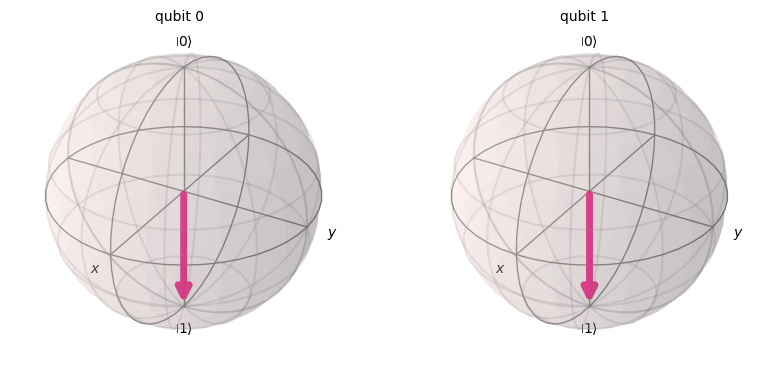

In [53]:
plot_bloch_multivector(state=psi)